# Zendesk Support Challenge 

**Problem**: The VP of Customer Advocacy has asked our team to evaluate how well we have been
supporting our customers over the last few quarters, and to provide meaningful business
insights.

**Why is Customer Service matter to the business ?**: 
A successful customer service team can help attract new business, boost retention, and increase sales among our existing customer base. But it is also a high stakes game:
- 73 % of consumers will leave for a competitor after multiple poor interactions 
- more than half will bolt after a single bad experience, according to the Zendesk Customer Experience Trends Report 2023. 
- Make it two negative experiences, and 76 percent of customers are out the door.

## Evaluate how well we have been supporting our customers

**What makes an excellent customer service ?**

Good customer service means consistently meeting customers’ expectations. Great customer service is **quick, easy, personalized, and empathetic**. Companies that deliver excellent customer service take the time needed to understand the needs of their unique customer base.


**Important Segments**: Channel, Tier, Plan, Group


### CSAT 

### First Reply Time (FRT)

makes sense to segment by channel

### Ticket Resolution Time 



### Ticket Response Rate 




## Lines of Research 

1. Are we optimizing ticket assigning by priority ? 
2. Are we maximizing performance on each channel ?
3. Are we performing well on all customer segments ?
4. Are 

## Model 


## Results 


## Limitations

In [188]:
from google.cloud import bigquery
from google.oauth2 import service_account

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from random import randint

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

import re
import string

from scipy import stats
from scipy.stats import norm, skew #for some statistics

credentials = service_account.Credentials.from_service_account_file(
'/Users/joaolousada/Downloads/solar-vertex-380321-55f7948b7f6a.json') 

project_id = 'solar-vertex-380321'
client = bigquery.Client(credentials= credentials,project=project_id)

In [6]:
import pandas_gbq

sql = """
SELECT *
FROM solar-vertex-380321.zendesk.zentest
"""
#df_raw = pandas_gbq.read_gbq(sql, project_id=project_id)

Downloading: 100%|██████████|


In [543]:
df = df_raw.copy()
df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
0,938,chat,Support (T1),2536525,2017-04-20,Enterprise Legacy,None,Tier 1,317,<NA>,11,15,0,<NA>,2014-11-10,Dublin,Employee,892
1,938,chat,Support (T1),2522091,2017-04-14,Enterprise Legacy,None,Tier 1,10260,<NA>,14,22,0,<NA>,2014-11-10,Dublin,Employee,886
2,1247,web,Support (T1),2836287,2017-08-03,Enterprise Legacy,None,Tier 1,<NA>,<NA>,4,<NA>,0,<NA>,2015-04-20,Dublin,Employee,836
3,919,help_center,Support (T1),3003180,2017-10-02,Enterprise Legacy,None,Tier 1,<NA>,<NA>,3,1,0,<NA>,2014-10-27,Madison,Employee,1071
4,919,help_center,Support (T1),3003011,2017-10-02,Enterprise Legacy,None,Tier 1,<NA>,<NA>,3,1,0,<NA>,2014-10-27,Madison,Employee,1071


In [544]:
df.describe()

,EmployeeID,TicketID,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerTenure
count,240665.000000,2.406650e+05,157169.000000,239741.000000,195237.000000,192623.000000,240665.000000,45554.000000,240665.000000
mean,1853.958444,2.612557e+06,813.261088,5949.678053,3.100309,3.834443,0.159300,0.939500,514.366223
std,651.379958,2.820156e+05,6446.203622,19227.491206,3.499996,4.566357,0.365957,0.238413,353.778344
min,1.000000,2.116910e+06,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-223.000000
25%,1488.000000,2.340143e+06,14.000000,13.000000,1.000000,2.000000,0.000000,1.000000,262.000000
50%,1975.000000,2.629618e+06,53.000000,116.000000,2.000000,2.000000,0.000000,1.000000,469.000000
75%,2362.000000,2.849437e+06,236.000000,8112.000000,4.000000,4.000000,0.000000,1.000000,675.000000
max,3411.000000,3.224171e+06,498116.000000,548814.000000,370.000000,245.000000,1.000000,1.000000,2334.000000


Duplicates


In [545]:
print(f'Number of duplicates - {df[df.duplicated()].nunique().sum()}')

Number of duplicates - 0


Missing Values

In [546]:
missing = df.isnull().sum()
missing = 100*missing[missing > 0]/df.shape[0]
missing.sort_values(inplace=True)
missing
#plt.savefig('images/MV.eps', format='eps', transparent = True)

DayTicketSolved          0.383936
FullResolutionTime       0.383936
AssigneeTier            13.568654
NumAgentComments        18.876031
NumPublicComments       19.962188
ZendeskPlan             26.150874
FirstReplyTime          34.693869
CustomerSatisfaction    81.071614
dtype: float64

In [547]:
for col in ('AssigneeTier', 'ZendeskPlan'):
    df[col] = df[col].fillna('None')

for col in ('NumPublicComments', 'NumAgentComments'):
    df[col] = df[col].fillna(0)

df['FirstReplyTime'] = df['FirstReplyTime'].fillna(0)

# Drop open tickets
df = df.dropna(subset=['FullResolutionTime', 'DayTicketSolved'])

df["CustomerSatisfaction"] = df["CustomerSatisfaction"].replace({0: -1}).fillna(0)

In [548]:
df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
924,688,chat,Zopim T1,2166897,2017-01-18,None,Friday,None,0,13309,1,0,0,-1,2014-06-01,Manila,Employee,962
925,1463,chat,Zopim T1,2132608,2017-01-06,None,Friday,None,0,4,0,0,0,0,2015-08-03,Manila,Employee,522
926,1463,chat,Zopim T1,2132014,2017-01-06,None,Friday,None,0,35,0,0,0,0,2015-08-03,Manila,Employee,522
927,1463,chat,Zopim T1,2878472,2017-08-18,None,Friday,None,0,0,0,0,0,0,2015-08-03,Manila,Employee,746
928,1463,chat,Zopim T1,2483674,2017-03-31,None,Friday,None,0,2,0,0,0,0,2015-08-03,Manila,Employee,606


## EDA 


ValueError: could not convert string to float: '>5Days'

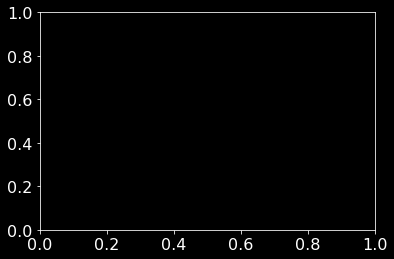

In [227]:
target = df['FullResolutionTime'].dropna()

sns.distplot(target , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(target)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ResolutionTime distribution')



In [45]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(target, plot=plt)
plt.show()

AttributeError: 'float' object has no attribute 'shape'

<Figure size 432x288 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x14db2afb0>,
 'caps': [<matplotlib.lines.Line2D at 0x14db2b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x14db2ae00>],
 'medians': [<matplotlib.lines.Line2D at 0x14db2baf0>],
 'fliers': [],
 'means': []}

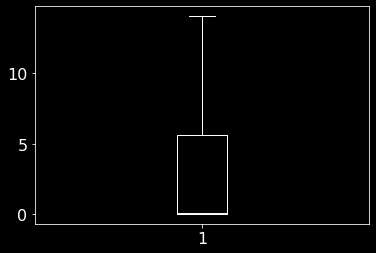

In [200]:
plt.boxplot(target, showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1405c5870>,
 'caps': [<matplotlib.lines.Line2D at 0x1405c5e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1405c55a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1405c63b0>],
 'fliers': [],
 'means': []}

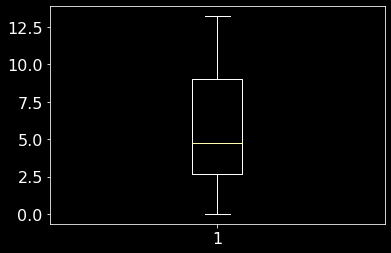

In [42]:
plt.boxplot(np.log1p(target), showfliers=False)

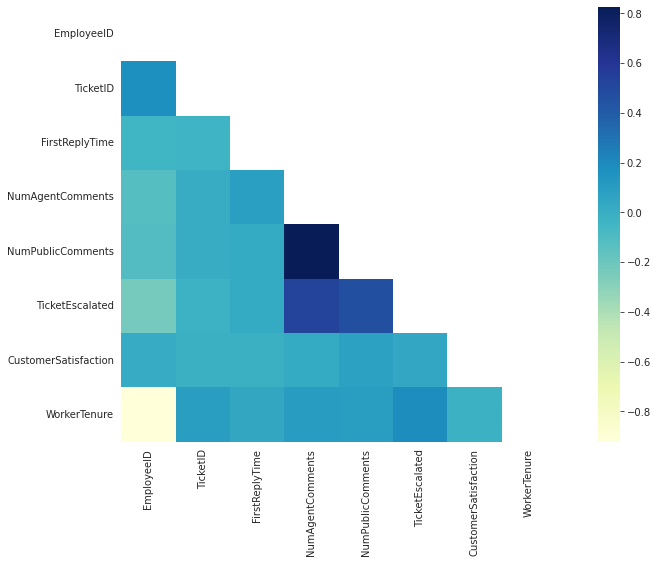

In [228]:
# Get correlations for the dataset loaded as df
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

test_correlations = df.corr();
plt.figure(figsize=(15, 8))
mask = np.zeros_like(test_correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
 ax = sns.heatmap(test_correlations, mask=mask, square=True, xticklabels=True, yticklabels=True, cmap='YlGnBu')

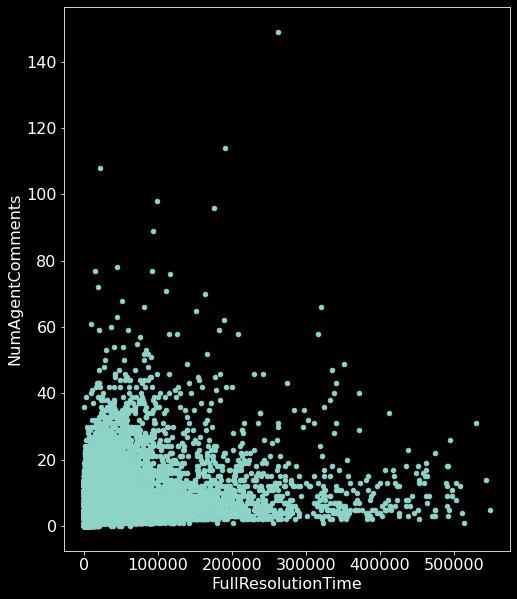

In [90]:
ax1 = df.plot.scatter(x='FullResolutionTime',y='NumAgentComments')

<function matplotlib.pyplot.show(close=None, block=None)>

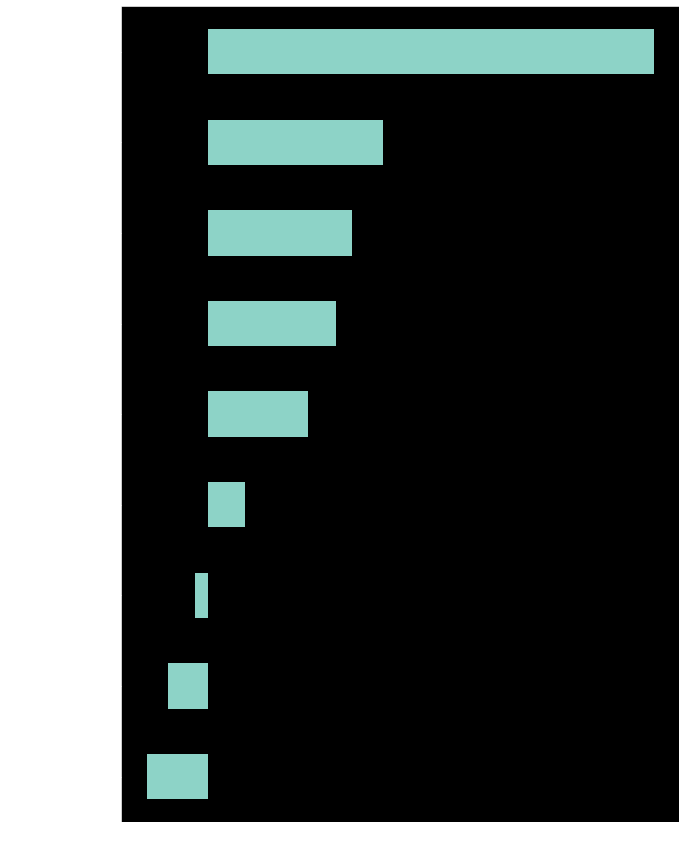

In [ ]:
cat_columns = df.select_dtypes(['category']).columns
df_corr = df.copy()
df_corr[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

corr_matrix = df_corr.corr()
f, ax = plt.subplots(figsize=(10,15))
corr_matrix['FullResolutionTime'].sort_values(ascending=True).plot.barh()
plt.show

In [70]:
df['TicketCreatedDate'] = pd.to_datetime(df['TicketCreatedDate'])
df['TicketCreatedYear'] = df['TicketCreatedDate'].dt.isocalendar().year
df['TicketCreatedWeekNr'] = df['TicketCreatedDate'].dt.isocalendar().week

In [73]:
df['TicketResolutionDate'] = pd.to_datetime((df['TicketCreatedDate'] + pd.to_timedelta(df['FullResolutionTime'], unit='min')).dt.date)
df['SolvedSameDay'] = df['TicketCreatedDate'] == df['TicketResolutionDate']
print(df[['TicketCreatedDate','TicketResolutionDate']])

       TicketCreatedDate TicketResolutionDate
924           2017-01-18           2017-01-27
925           2017-01-06           2017-01-06
926           2017-01-06           2017-01-06
927           2017-08-18           2017-08-18
928           2017-03-31           2017-03-31
...                  ...                  ...
240660        2017-07-17           2017-07-19
240661        2017-05-22           2017-06-14
240662        2017-06-27           2017-07-04
240663        2017-07-05           2017-07-18
240664        2017-04-21           2017-05-09

[239741 rows x 2 columns]


<AxesSubplot:xlabel='TicketCreatedYear,TicketCreatedWeekNr'>

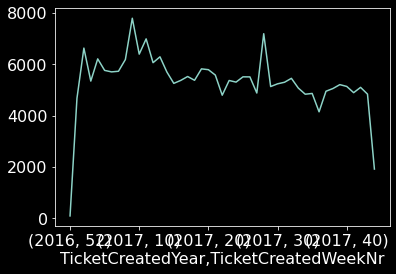

In [74]:
# Volume of tickets Overtime

df.groupby(['TicketCreatedYear','TicketCreatedWeekNr'])['TicketID'].count().plot.line()

<AxesSubplot:xlabel='TicketCreatedYear,TicketCreatedWeekNr'>

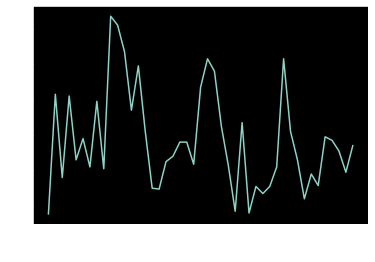

In [ ]:
# time to solve tickets

df.groupby(['TicketCreatedYear','TicketCreatedWeekNr'])['FullResolutionTime'].median().plot.line()

<AxesSubplot:>

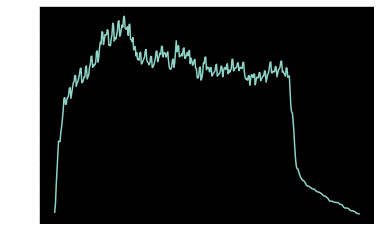

In [ ]:
# daily ticket queue

def queue_size(date): 
    mask = (date >= df['TicketCreatedDate']) & (date < df['TicketResolutionDate'])
    return df.loc[mask]['TicketID'].count()

ts=pd.Series(pd.date_range(start=df['TicketCreatedDate'].min(), end=df['TicketResolutionDate'].max()))
ts.apply (lambda row: queue_size(row)).plot.line()


In [ ]:
def f(x):
    d = {}
    d['volume'] = x['TicketID'].count()
    d['response_rate'] = round(100*x[x['CustomerSatisfaction'] != None]['TicketID'].count() / x['TicketID'].count(), 2)
    d['csat_score'] = round(100*x['CustomerSatisfaction'].sum()/x[x['CustomerSatisfaction'] != None]['TicketID'].count() , 2)
    return pd.Series(d, index=['volume', 'response_rate', 'csat_score'])

df.groupby('ZendeskPlan').apply(f).sort_values( by='volume', ascending=False)

,volume,response_rate,csat_score
ZendeskPlan,,,
None,62776.0,14.16,89.04
Enterprise Legacy,44452.0,22.78,96.11
Trial,33322.0,21.70,95.28
Professional,22866.0,22.37,94.76
Plus,18383.0,24.13,95.22
Non-Customer,12839.0,1.85,79.75
Team,11734.0,20.58,94.24
Expired,11210.0,21.09,94.63
Enterprise,7052.0,24.73,95.87


<AxesSubplot:>

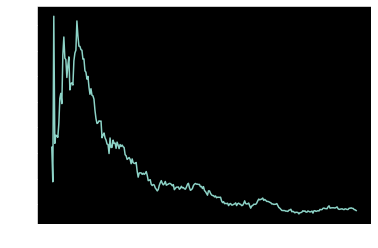

In [ ]:
# CSAT Over time 

def csat(date): 
    mask = (date >= df['TicketCreatedDate']) & (df['CustomerSatisfaction'] != None)
    return 100*df.loc[mask]['CustomerSatisfaction'].sum()/df.loc[mask]['TicketID'].count()

ts=pd.Series(pd.date_range(start=df['TicketCreatedDate'].min(), end=df['TicketCreatedDate'].max()))
ts.apply (lambda row: csat(row)).plot.line()


<AxesSubplot:xlabel='TicketCreatedYear,TicketCreatedWeekNr'>

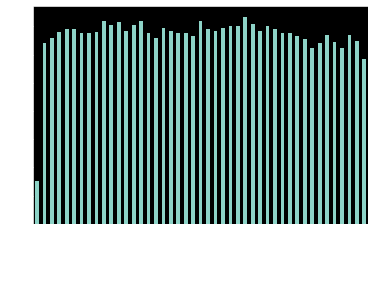

In [ ]:
# Weekly Active Employees 
df.groupby(['TicketCreatedYear','TicketCreatedWeekNr'])['EmployeeID'].nunique().plot.bar()

In [ ]:
# Ticket Info 
q1 = f'how many tickets were created ?\n'
a1 = df['TicketID'].nunique()
print(q1,a1)

q2 = f'--- \nhow % of tickets were solved ?\n'
a2 = df['FullResolutionTime'].count()
print(q2,np.round(100*a2/a1, 2))

q3 = f'--- \nhow long does it take to solve a ticket ?\n'
print(q3, df['FullResolutionTime'].describe())

q4 = f'--- \nWhat channels receive more tickets ?\n'
print(q4, df.groupby(['TicketChannel'])['TicketID'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['count'], ascending=False)
)



how many tickets were created ?
 239741
--- 
how % of tickets were solved ?
 100.0
--- 
how long does it take to solve a ticket ?
 count    239741.000000
mean       5949.678053
std       19227.491206
min           0.000000
25%          13.000000
50%         116.000000
75%        8112.000000
max      548814.000000
Name: FullResolutionTime, dtype: float64
--- 
What channels receive more tickets ?
   TicketChannel  count
1          chat  87874
8           web  66105
2         email  44627
7         voice  32886
0           api   4752
6       twitter   2039
3      facebook    819
4   help_center    630
5        mobile      9


In [ ]:
# average tickets solved per day per employee

df.groupby(['EmployeeID']).agg({'TicketID':['count'], 
                         'FullResolutionTime':['count','median', 'mean'],
                         'FirstReplyTime': ['count', 'median'],
                         'NumAgentComments': 'median',
                         'NumPublicComments': 'median',
                         'TicketEscalated': 'sum',
                         'CustomerSatisfaction': 'sum'
                         }).sort_values(by=('CustomerSatisfaction','sum'), ascending=False)


TicketID FullResolutionTime                       FirstReplyTime  \
              count              count   median         mean          count   
EmployeeID                                                                    
2081          14040              14040      5.0   166.566453          14040   
2050           7828               7828      9.0    322.87187           7828   
1463           7676               7676      6.0   250.369724           7676   
2031           3568               3568   1608.0  6750.746357           3568   
2149           4675               4675     60.0  4807.848342           4675   
...             ...                ...      ...          ...            ...   
1077              2                  2    191.0        191.0              2   
939               6                  6    468.5  3249.166667              6   
411               5                  5     12.0      23569.2              5   
528               1                  1  22723.0      22723.0              1   
553               1                  1     78.0         78.0              1   

                   NumAgentComments NumPublicComments TicketEscalated  \
            median           median            median             sum   
EmployeeID                                                              
2081          -1.0              0.0               0.0             254   
2050          -1.0              0.0               0.0             140   
1463          -1.0              0.0               0.0             100   
2031          46.5              2.0               2.0              55   
2149          16.0              2.0               2.0              74   
...            ...              ...               ...             ...   
1077          23.5              1.5               3.0               1   
939            5.5              2.0               3.0               1   
411           -1.0              2.0               0.0               0   
528         4257.0              4.0               3.0               1   
553           78.0              3.0               2.0               0   

           CustomerSatisfaction  
                            sum  
EmployeeID                       
2081                       1960  
2050                       1262  
1463                       1073  
2031                        767  
2149                        741  
...                         ...  
1077                          0  
939                           0  
411                           0  
528                           0  
553                           0  

[193 rows x 10 columns]

In [275]:
corr_matrix = df.corr()
corr_matrix['FullResolutionTime'].sort_values(ascending=False)

KeyError: 'FullResolutionTime'

## Preprocessing

In [549]:
df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
924,688,chat,Zopim T1,2166897,2017-01-18,None,Friday,None,0,13309,1,0,0,-1,2014-06-01,Manila,Employee,962
925,1463,chat,Zopim T1,2132608,2017-01-06,None,Friday,None,0,4,0,0,0,0,2015-08-03,Manila,Employee,522
926,1463,chat,Zopim T1,2132014,2017-01-06,None,Friday,None,0,35,0,0,0,0,2015-08-03,Manila,Employee,522
927,1463,chat,Zopim T1,2878472,2017-08-18,None,Friday,None,0,0,0,0,0,0,2015-08-03,Manila,Employee,746
928,1463,chat,Zopim T1,2483674,2017-03-31,None,Friday,None,0,2,0,0,0,0,2015-08-03,Manila,Employee,606


In [552]:
df.set_index('TicketID')

df['TicketCreatedMonth'] = pd.DatetimeIndex(df['TicketCreatedDate']).month
df['HasResponded'] = df.apply(lambda x: 0 if x['CustomerSatisfaction'] == 0 else 1, axis=1)

exclude = [
    'TicketID',
    'WorkerDateHired',
    'TicketCreatedDate',
    'CustomerSatisfaction'
]

df = df.drop(exclude, axis=1)

df.head()

,EmployeeID,TicketChannel,TicketGroup,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,WorkerLocation,Worker_Type,WorkerTenure,TicketCreatedMonth,HasResponded
924,688,chat,Zopim T1,None,Friday,None,0,13309,1,0,0,Manila,Employee,962,1,1
925,1463,chat,Zopim T1,None,Friday,None,0,4,0,0,0,Manila,Employee,522,1,0
926,1463,chat,Zopim T1,None,Friday,None,0,35,0,0,0,Manila,Employee,522,1,0
927,1463,chat,Zopim T1,None,Friday,None,0,0,0,0,0,Manila,Employee,746,8,0
928,1463,chat,Zopim T1,None,Friday,None,0,2,0,0,0,Manila,Employee,606,3,0


In [553]:
from sklearn.preprocessing import LabelEncoder

df_cat = list(df.select_dtypes(include=object))

# process columns, apply LabelEncoder to categorical features
for c in df_cat:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

df.head()

,EmployeeID,TicketChannel,TicketGroup,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,WorkerLocation,Worker_Type,WorkerTenure,TicketCreatedMonth,HasResponded
924,688,1,26,7,0,0,0,13309,1,0,0,5,1,962,1,1
925,1463,1,26,7,0,0,0,4,0,0,0,5,1,522,1,0
926,1463,1,26,7,0,0,0,35,0,0,0,5,1,522,1,0
927,1463,1,26,7,0,0,0,0,0,0,0,5,1,746,8,0
928,1463,1,26,7,0,0,0,2,0,0,0,5,1,606,3,0


In [554]:
df['FullResolutionTime'] = np.log1p(df['FullResolutionTime'])
df['FirstReplyTime'] = np.log1p(df['FirstReplyTime'])


In [555]:
corr_matrix = df.corr()
corr_matrix['HasResponded'].sort_values(ascending=False)

HasResponded          1.000000
FirstReplyTime        0.110874
NumPublicComments     0.102774
FullResolutionTime    0.076653
TicketEscalated       0.048041
NumAgentComments      0.039447
DayTicketSolved       0.024282
Worker_Type           0.018216
EmployeeID            0.018010
WorkerLocation        0.001617
ZendeskPlan          -0.002272
TicketCreatedMonth   -0.006962
WorkerTenure         -0.020241
TicketGroup          -0.025120
TicketChannel        -0.032974
AssigneeTier         -0.046261
Name: HasResponded, dtype: float64

In [453]:
corr_matrix['FullResolutionTime'].sort_values(ascending=False)

FullResolutionTime      1.000000
NumPublicComments       0.506921
NumAgentComments        0.459622
TicketEscalated         0.373763
TicketChannel           0.260109
FirstReplyTime          0.141258
AssigneeTier            0.113699
WorkerLocation          0.053964
WorkerTenure            0.051527
CustomerSatisfaction    0.039248
DayTicketSolved        -0.010984
Worker_Type            -0.014857
ZendeskPlan            -0.037085
EmployeeID             -0.049360
TicketGroup            -0.188790
Name: FullResolutionTime, dtype: float64

In [475]:
included = ['NumPublicComments', 'NumAgentComments', 'TicketEscalated', 'TicketChannel', 'FirstReplyTime','TicketGroup', 'FullResolutionTime']

df_new = df[included]

In [476]:
df_new.head()

,NumPublicComments,NumAgentComments,TicketEscalated,TicketChannel,FirstReplyTime,TicketGroup,FullResolutionTime
924,0,1,0,1,0,26,9.496271
925,0,0,0,1,0,26,1.609438
926,0,0,0,1,0,26,3.583519
927,0,0,0,1,0,26,0.0
928,0,0,0,1,0,26,1.098612


## Regression 



In [456]:
from sklearn.metrics import mean_squared_error,roc_auc_score, auc, roc_curve, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
import optuna

cv = KFold(n_splits=4)

In [497]:
df_model = df_new.copy()

y = df_model.pop('FullResolutionTime')
X = df_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [498]:
from sklearn.linear_model import LinearRegression, LassoCV

model = LinearRegression()
score = cross_val_score(
     model, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error"
    ).mean()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

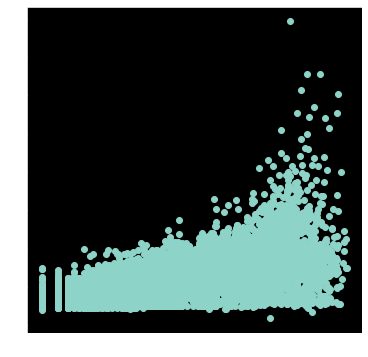

In [499]:
plt.scatter(y_test, (y_pred))

MSE of rf on test set: 6.29
R2 of rf on test set: 0.38


(array([1.0000e+00, 1.0000e+00, 3.0000e+00, 8.0000e+00, 1.4000e+01,
        1.1200e+02, 1.4143e+04, 2.3377e+04, 1.0094e+04, 1.9600e+02]),
 array([-28.94426828076888, -25.03726622453837, -21.13026416830786,
        -17.22326211207735, -13.31626005584684, -9.40925799961633,
        -5.502255943385819, -1.5952538871553088, 2.3117481690752015,
        6.218750225305712, 10.125752281536226], dtype=object),
 <BarContainer object of 10 artists>)

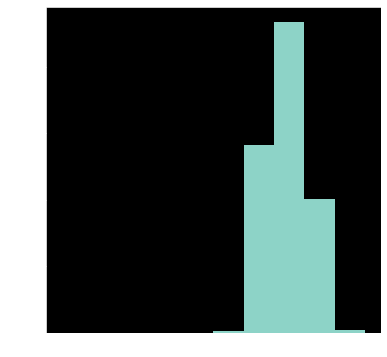

In [500]:
print('MSE of rf on test set: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R2 of rf on test set: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.hist(y_test - y_pred)

<AxesSubplot:xlabel='preds', ylabel='residuals'>

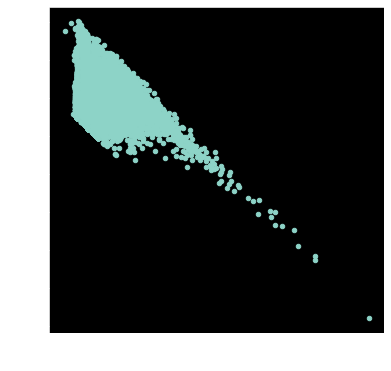

In [501]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": y_pred, "true": y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

### Lasso


In [481]:
model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
score = cross_val_score(
     model, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error"
    ).mean()
print(score)

model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test)

-2.510805302818416


RMSE of rf on test set: 6.29
R2 of rf on test set: 0.38


(array([1.0000e+00, 1.0000e+00, 3.0000e+00, 7.0000e+00, 1.4000e+01,
        1.1100e+02, 1.4102e+04, 2.3372e+04, 1.0141e+04, 1.9700e+02]),
 array([-28.9670582951032, -25.058655723554015, -21.15025315200483,
        -17.241850580455647, -13.333448008906462, -9.425045437357277,
        -5.516642865808095, -1.6082402942589091, 2.3001622772902763,
        6.208564848839458, 10.116967420388647], dtype=object),
 <BarContainer object of 10 artists>)

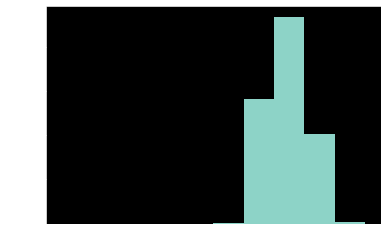

In [482]:
print('RMSE of rf on test set: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R2 of rf on test set: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.hist(y_test - y_pred)


In [472]:
coef = pd.Series(model.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 6 variables and eliminated the other 0 variables


In [473]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

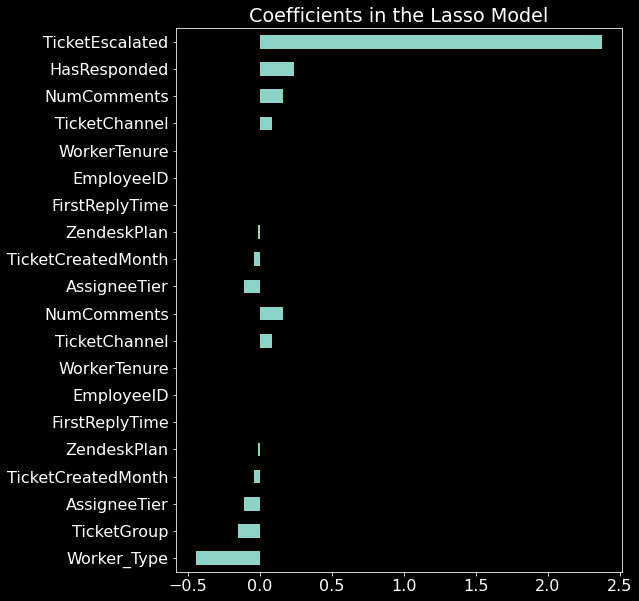

In [148]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### Random Forest Regression

In [502]:
def objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 200)
    _max_depth = trial.suggest_int("max_depth", 5, 12)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 8)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 3, 6)
    _max_features = trial.suggest_int("max_features", 10, 50)

    rf = RandomForestRegressor(
     max_depth=_max_depth,
     min_samples_split=_min_samp_split,
     min_samples_leaf=_min_samples_leaf,
     max_features=_max_features,
     n_estimators=_n_estimators,
     n_jobs=-1,
     random_state=42,
    )

    score = cross_val_score(
     rf, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error"
    ).mean()
    return score


optuna.logging.set_verbosity(0)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

rf_params = study.best_params
rf_best_score = study.best_value
print(f"Best score:{rf_best_score} \nOptimized parameters: {rf_params}")

Best score:-1.728744159804675 
Optimized parameters: {'n_estimators': 122, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 27}


In [503]:
rf_params = {
    'max_depth': 10, 
    'min_samples_split': 8,
    'min_samples_leaf': 4,
    'max_features': 27,
    "n_estimators": 122
}

In [504]:
rf = RandomForestRegressor(**rf_params)

stack_scores = cross_val_score(
    rf, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error"
)

rf.fit(X_train.values, y_train.values)
y_pred = rf.predict(X_test)

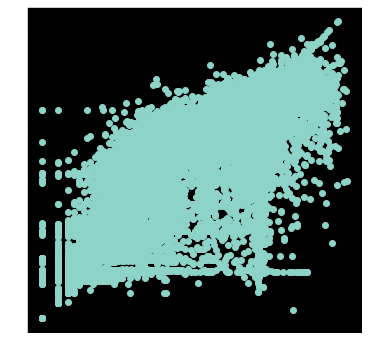

In [505]:
plt.scatter(y_test, (y_pred))

RMSE of rf on test set: 1.72
R2 of rf on test set: 0.71


(array([4.0000e+00, 6.7000e+01, 1.0480e+03, 9.1360e+03, 2.3382e+04,
        1.1444e+04, 2.1420e+03, 5.9600e+02, 1.1100e+02, 1.9000e+01]),
 array([-8.978431524700262, -7.036928441476287, -5.095425358252312,
        -3.1539222750283376, -1.2124191918043623, 0.7290838914196129,
        2.6705869746435873, 4.612090057867563, 6.553593141091538,
        8.495096224315514, 10.43659930753949], dtype=object),
 <BarContainer object of 10 artists>)

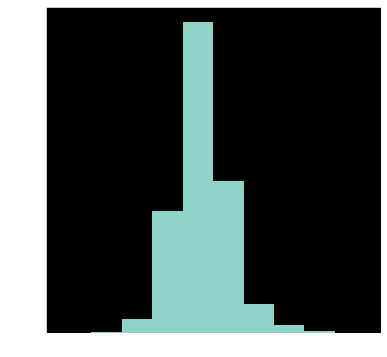

In [506]:
print('RMSE of rf on test set: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 of rf on test set: {:.2f}'.format(r2_score(y_test, y_pred)))
plt.hist(y_test - y_pred) 

<AxesSubplot:xlabel='preds', ylabel='residuals'>

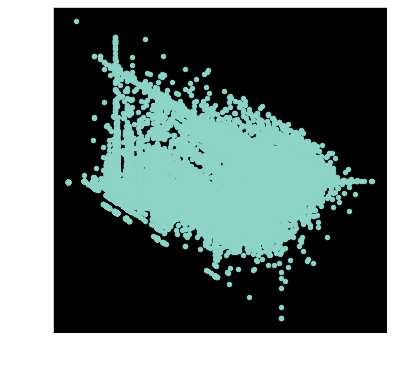

In [507]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds": y_pred, "true": y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

## Classification

In [531]:
df.head()

,EmployeeID,TicketChannel,TicketGroup,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,WorkerLocation,Worker_Type,WorkerTenure,TicketCreatedMonth,HasResponded
924,688,1,26,7,0,0,0,13309,1,0,0,5,1,962,1,1
925,1463,1,26,7,0,0,0,4,0,0,0,5,1,522,1,0
926,1463,1,26,7,0,0,0,35,0,0,0,5,1,522,1,0
927,1463,1,26,7,0,0,0,0,0,0,0,5,1,746,8,0
928,1463,1,26,7,0,0,0,2,0,0,0,5,1,606,3,0


In [532]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import optuna

cv = KFold(n_splits=4)

In [533]:
df_model = df.copy()

y = df_model.pop('HasResponded')
X = df_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [534]:
from collections import Counter
print(Counter(y_train))

Counter({0: 155283, 1: 36509})


In [535]:
def baseline(train, test, target, model): 
    cv = KFold(n_splits=5)
    
    # Data Normalization
    sc = StandardScaler()
    train = sc.fit_transform(train)
    test = sc.transform(test)

    score = cross_val_score(model, train, target, cv=cv, scoring="roc_auc")
    print('%.3f' % score.mean())

    model.fit(train, target)
    predictions = model.predict(test)

    return predictions

In [536]:
lr = LogisticRegression(penalty='l2', class_weight='balanced')
y_pred = baseline(X_train, X_test, y_train, lr)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

0.636
[[20453 18451]
 [ 2955  6090]]
Precision: 0.248
Recall: 0.673
F1: 0.363
Accuracy: 0.554


In [410]:
rf = RandomForestClassifier()
y_pred = baseline(X_train, X_test, y_train, rf)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

0.663
[[36379  2525]
 [ 7795  1250]]
Precision: 0.331
Recall: 0.138
F1: 0.195
Accuracy: 0.785


## Improvements

In [ ]:

df["FullResolutionTime"] = df["FullResolutionTime"].apply(lambda x: x / 1440)
df["FullResolutionTime"] = pd.cut(x=df["FullResolutionTime"], bins=[-0.1,1/96,1/12,5, np.inf], labels=["<15 min","<2 hours","5 Days", ">5Days"])

df["FirstReplyTime"] = df["FirstReplyTime"].apply(lambda x: x / 1440)
df["FirstReplyTime"] = pd.cut(x=df["FirstReplyTime"], bins=[-1.1,0,1/24,1/6,5, np.inf], labels=["missing","<15 min","<1 hour","<4 hours", ">4 hours"])